In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [3]:
df.shape

(400, 5)

In [4]:
X = df.iloc[:,[2,3]]
Y = df.iloc[:,4]

Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.25, random_state=0)

In [6]:
ss = StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [7]:
classifier=svm.SVC(kernel='rbf')
classifier.fit(xtrain, ytrain)

SVC()

In [8]:
ypred=classifier.predict(xtest)

In [9]:
from sklearn import metrics
print(metrics.accuracy_score(ytest,ypred))

0.93


In [14]:
#with gamma
classifier2 =svm.SVC(kernel='rbf', gamma=15, C=7, random_state=0)
classifier2.fit(xtrain,ytrain)

predy=classifier2.predict(xtest)

print("The accuracy score is", metrics.accuracy_score(ytest,predy))

The accuracy score is 0.92


In [16]:
#using polynomial kernel
classifier3 =svm.SVC(kernel='poly', degree=5)
classifier3.fit(xtrain,ytrain)

predy1=classifier3.predict(xtest)

print("The accuracy score is", metrics.accuracy_score(ytest,predy1))

The accuracy score is 0.84


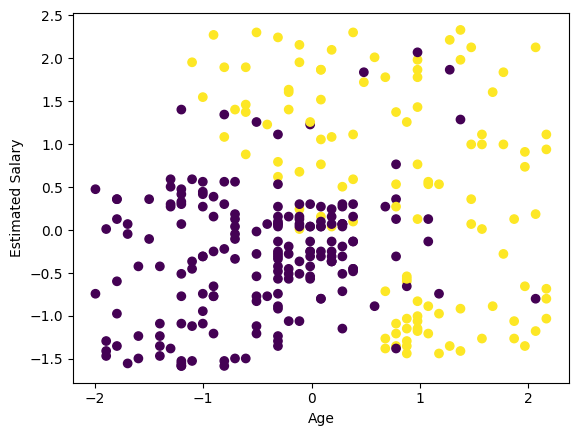

In [17]:
#visualizing the data
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

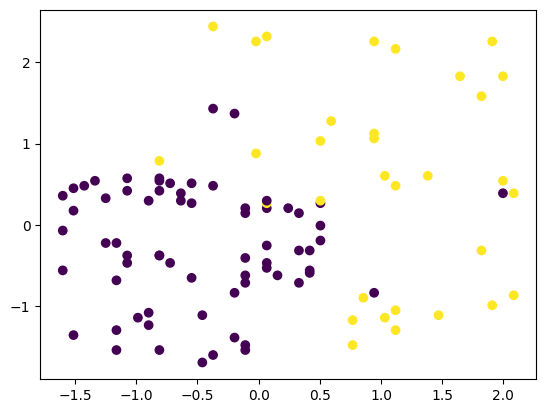

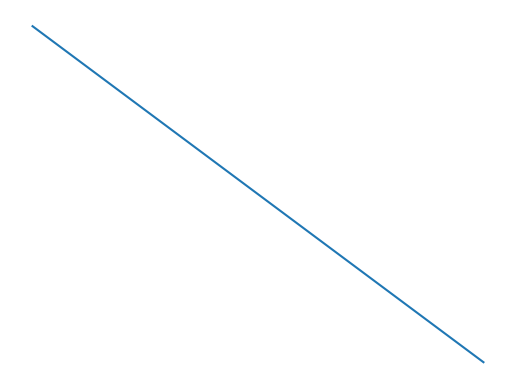

In [22]:
classif= svm.SVC(kernel="linear", random_state=0)
classif.fit(xtrain, ytrain)
predic=classif.predict(xtest)

plt.scatter(xtest[:,0], xtest[:,1], c=ytest)
plt.show()

w=classif.coef_[0]
a=-w[0]/w[1]
xx= np.linspace(-2.5, 2.5)
yy = a * xx - (classif.intercept_[0]) /w[1]

plt.plot(xx,yy)
plt.axis("off"),plt.show();